In [1]:
%matplotlib inline

In [2]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import pymaster as nmt
import glob,gc,os

In [3]:
# Information for TIGRESS synthetic maps
# dust polarization maps at 353 GHz can be downloaded at https://lambda.gsfc.nasa.gov/simulation/tb_tigress_data.cfm
data_folder = '../data/allsky_maps/'

# 9 observer positions
observers = ['x0y0z0','x-256y0z0','x256y0z0',
             'x0y-256z0','x-256y-256z0','x256y-256z0',
             'x0y256z0','x-256y256z0','x256y256z0']

# 350 snapshots to process
itimes=np.arange(300,650,dtype=int)

In [10]:
# pandas and xarray are used to handle data
import pandas as pd
import xarray as xr
# seaborn is used for plotting
import seaborn as sns

# for |b|>30 

In [26]:
with xr.open_dataset('../data/all_cls.nc') as dset:
    avg=dset.sel(leff=slice(80,120)).mean(dim='leff')

In [27]:
ratio=xr.Dataset()
ratio['EEBB'] = avg['EE']/avg['BB']
ratio['rTE'] = avg['TE']/np.sqrt(avg['TT']*avg['EE'])
ratio['rTB'] = avg['TB']/np.sqrt(avg['TT']*avg['BB'])
ratio['rEB'] = avg['EB']/np.sqrt(avg['BB']*avg['EE'])

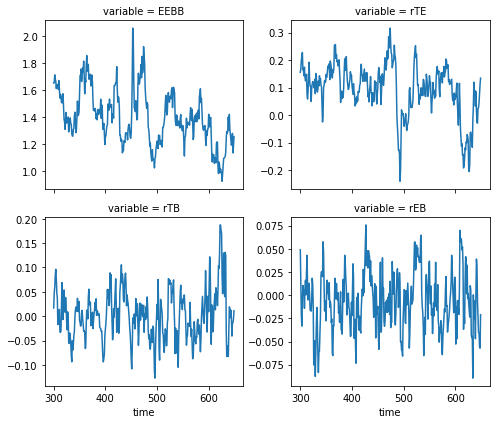

In [28]:
ratio.mean(dim='observer').to_array().plot(col='variable',sharey=False,col_wrap=2)

In [29]:
# convert to pandas dataframe to use seaborn pairplot
dlist=[]
for i,obs in enumerate(observers):
    df = ratio.sel(observer=i).to_array().to_pandas()
    ob=pd.Series(np.zeros_like(ratio.time)+i+1,index=ratio.time,name='observer',dtype=int)
    dlist.append(df.append(ob).T)

df=pd.concat(dlist,ignore_index=True)

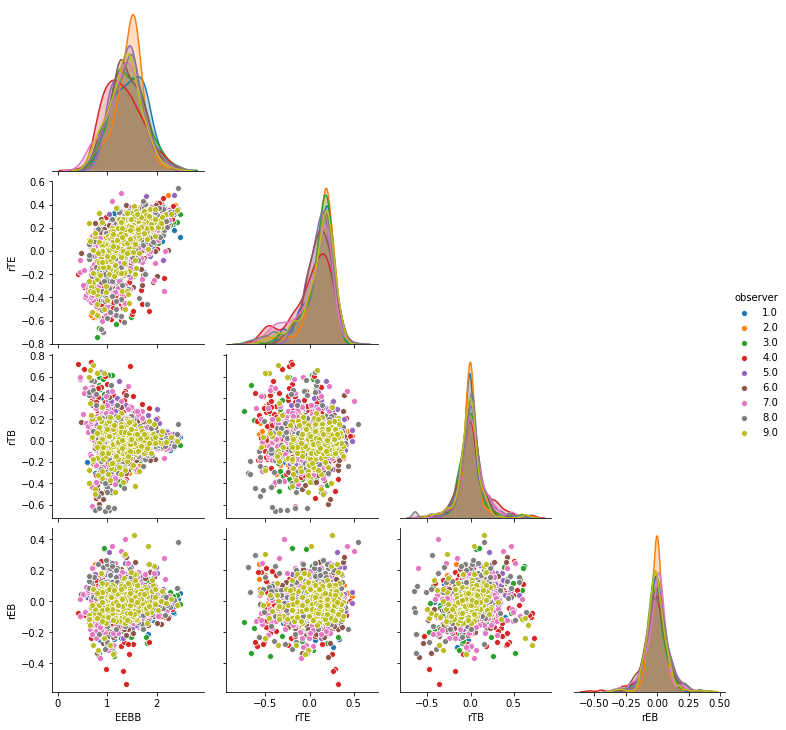

In [30]:
g = sns.pairplot(df.where((df.EEBB<2.5)),hue='observer',dropna=True,corner=True)
g.savefig('../figures/all_ratios_b30.png',bbox_inches='tight',dpi=200)

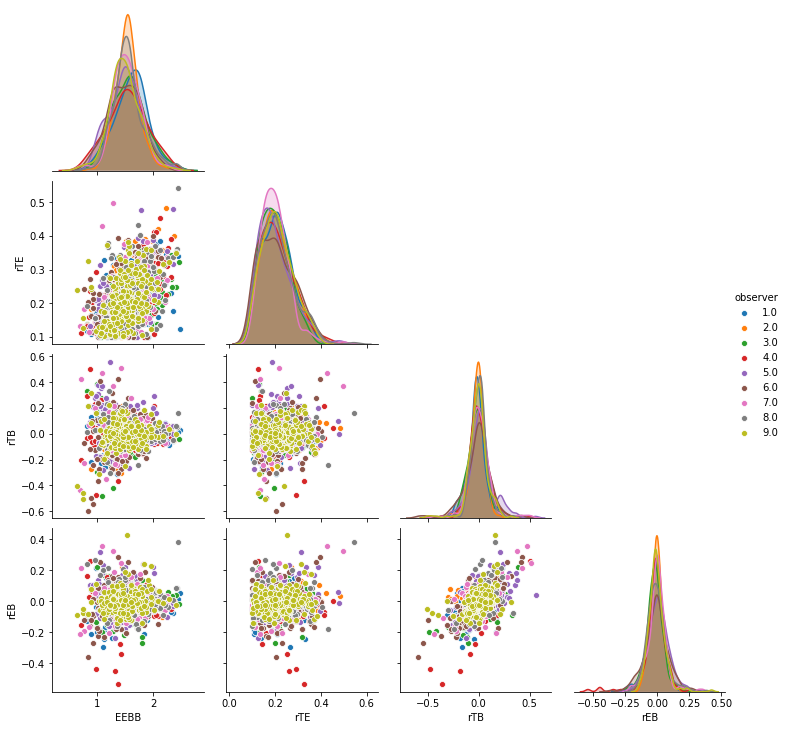

In [33]:
g=sns.pairplot(df.where((df.rTE>0.1) & (df.EEBB<2.5)),hue='observer',dropna=True,corner=True)
g.savefig('../figures/rTEp01_ratios_b30.png',bbox_inches='tight',dpi=200)

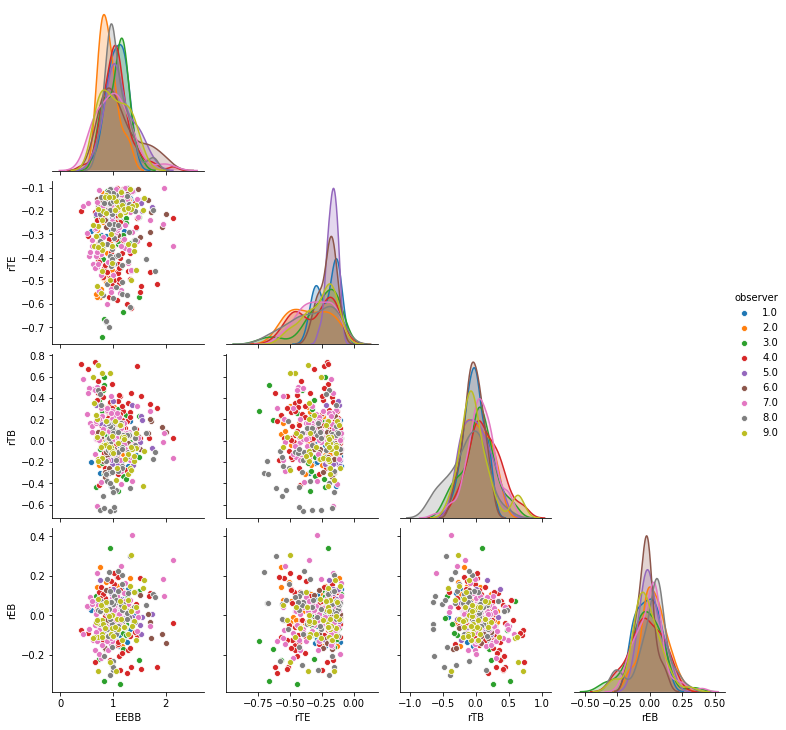

In [34]:
g=sns.pairplot(df.where((df.rTE<-0.1) & (df.EEBB<2.5)),hue='observer',dropna=True,corner=True)
g.savefig('../figures/rTEn01_ratios_b30.png',bbox_inches='tight',dpi=200)

# for |b|>60 

In [35]:
with xr.open_dataset('../data/all_cls.b60.nc') as dset:
    avg=dset.sel(leff=slice(80,120)).mean(dim='leff')

In [36]:
ratio=xr.Dataset()
ratio['EEBB'] = avg['EE']/avg['BB']
ratio['rTE'] = avg['TE']/np.sqrt(avg['TT']*avg['EE'])
ratio['rTB'] = avg['TB']/np.sqrt(avg['TT']*avg['BB'])
ratio['rEB'] = avg['EB']/np.sqrt(avg['BB']*avg['EE'])

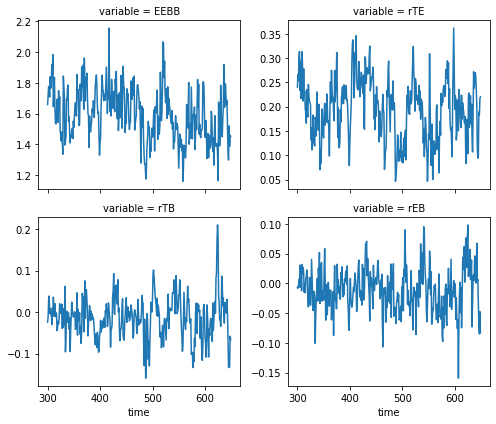

In [37]:
ratio.mean(dim='observer').to_array().plot(col='variable',sharey=False,col_wrap=2)

In [38]:
# convert to pandas dataframe to use seaborn pairplot
dlist=[]
for i,obs in enumerate(observers):
    df = ratio.sel(observer=i).to_array().to_pandas()
    ob=pd.Series(np.zeros_like(ratio.time)+i+1,index=ratio.time,name='observer',dtype=int)
    dlist.append(df.append(ob).T)

df=pd.concat(dlist,ignore_index=True)

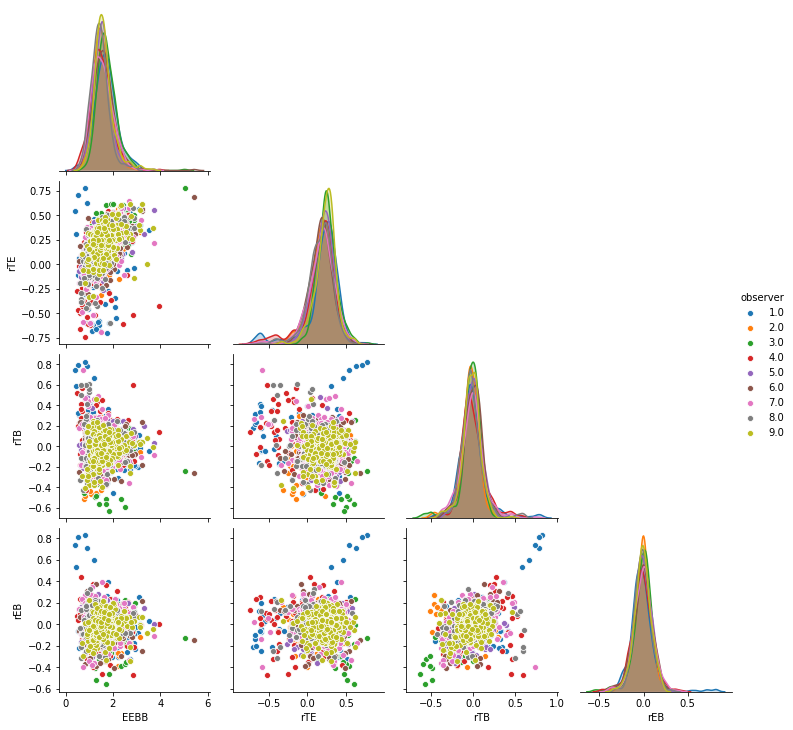

In [39]:
g = sns.pairplot(df,hue='observer',dropna=True,corner=True)
g.savefig('../figures/all_ratios_b60.png',bbox_inches='tight',dpi=200)

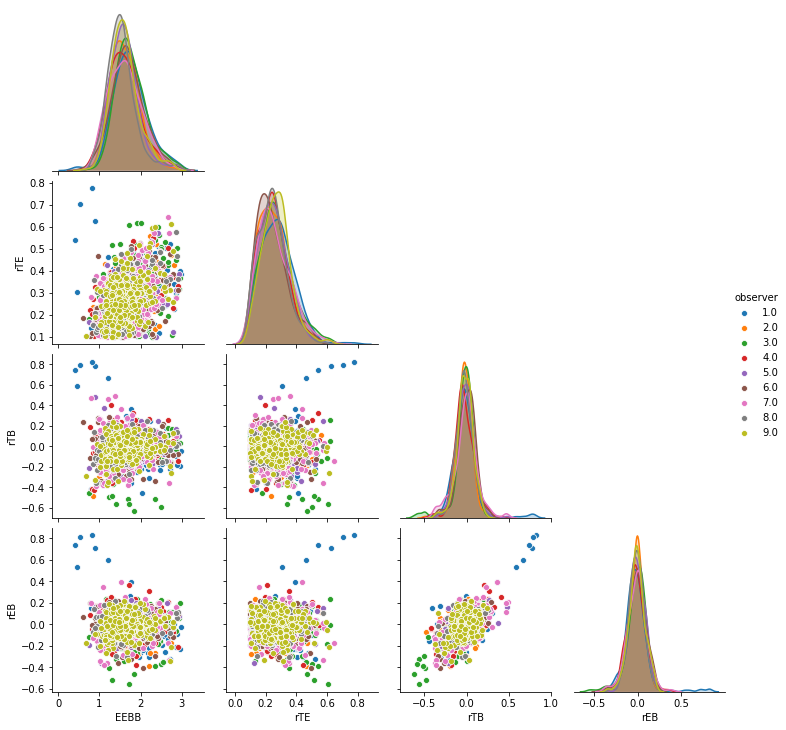

In [40]:
g = sns.pairplot(df.where((df.rTE>0.1) & (df.EEBB<3)),hue='observer',dropna=True,corner=True)
g.savefig('../figures/rTEp01_ratios_b60.png',bbox_inches='tight',dpi=200)

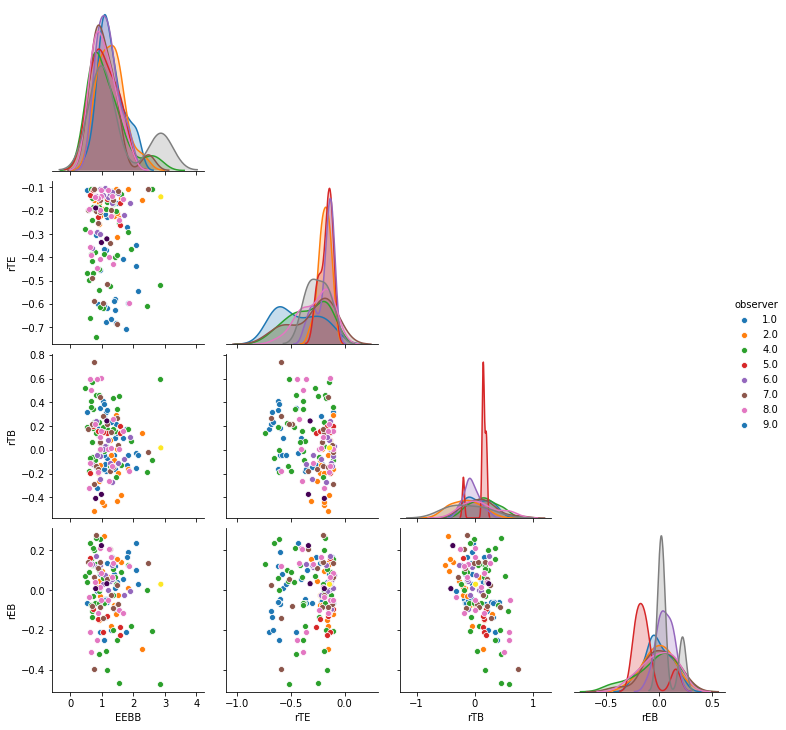

In [41]:
g = sns.pairplot(df.where((df.rTE<-0.1) & (df.EEBB<3)),hue='observer',dropna=True,corner=True)
g.savefig('../figures/rTEn01_ratios_b60.png',bbox_inches='tight',dpi=200)